# Course Project
## Instructions
One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will use the tools and techniques you learned throughout this course to train a few linear regressions on a data set that you feel passionate about, select the regression that best suits your needs, and communicate insights you found from your modeling exercise.

After going through some guided steps, you will have insights that either explain or predict your outcome variable. As a main deliverable, you will submit a report that helps you focus on highlighting your analytical skills and thought process. 

## Process
- Optional: find your own data set
As a suggested first step, spend some time finding a data set that you are really passionate about. This can be a data set similar to the data you have available at work or data you have always wanted to analyze. For some people this will be sports data sets, while some other folks prefer to focus on data from a datathon or data for good.

- Optional: participate in a discussion board
As an optional step, go into a discussion board and brainstorm with your peers great data sets to analyze. If you prefer to skip this step, feel free to use the Ames housing data set or the Churn phone data set that we used throughout the course.

- Required
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.

### Sections required in your report:
1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
1. Brief description of the data set you chose and a summary of its attributes.
1. Brief summary of data exploration and actions taken for data cleaning and feature engineering.
1. Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
1. A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
1. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
1. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.

### The grading will center around 5 main points:
1. Does the report include a section describing the data?
1. Does the report include a paragraph detailing the main objective(s) of this analysis?  
1. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
1. Does the report include a clear and well presented section with key findings related to the main objective(s) of the analysis?
1. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 
---

# Main Objective
__Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.__

Exoplanets are a data-rich subject where population characterizations can help provide insight into many fascinating topics including: stellar evolution, planetary evolution, habitable worlds surveying, and origins of life in the universe. From the dataset (located at `https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS`), regression analaysis can provide critical insights into some of these topics.

The models developed here today will be mostly focused on __Interpretation__ of the dataset.

In [1]:
# Disable warnings in Jupyter Notebook
import warnings
warnings.simplefilter("ignore")

# Import Block
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Models and Statistics
# from scipy.stats import mstats, boxcox
# from scipy.special import inv_boxcox
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

In [2]:
# Initial Configs
%matplotlib inline
sns.set_style()

# Constants
EXOPLANET_CSV_FILEPATH = 'data/exoplanets.csv'
COMMENT_TOKEN = '#'

# Dataset Description
__Brief description of the data set you chose and a summary of its attributes.__

I chose a dataset off of Cal Tech's Exoplanet Archive (namely: `https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS`) that contains statistics of some 32k exoplanet candidates (of which ~5k are confirmed). 

This datasets contains details on each of the exo-planets such as their:
- Discovery method and facility
- Scientific group that discovered this planet
- Planet orbitology
- Planet descriptive data
- Parent star's (or stars') descriptive data

This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
Sun Sep  4 11:30:27 2022
<details>
<summary style="font-size:14px">View columns...</summary>
<p>

\```
- COLUMN pl_name:        Planet Name
- COLUMN hostname:       Host Name
- COLUMN pl_letter:      Planet Letter
- COLUMN hd_name:        HD ID
- COLUMN hip_name:       HIP ID
- COLUMN tic_id:         TIC ID
- COLUMN gaia_id:        GAIA ID
- COLUMN default_flag:   Default Parameter Set
- COLUMN sy_snum:        Number of Stars
- COLUMN sy_pnum:        Number of Planets
- COLUMN sy_mnum:        Number of Moons
- COLUMN cb_flag:        Circumbinary Flag
- COLUMN discoverymethod: Discovery Method
- COLUMN disc_year:      Discovery Year
- COLUMN disc_refname:   Discovery Reference
- COLUMN disc_pubdate:   Discovery Publication Date
- COLUMN disc_locale:    Discovery Locale
- COLUMN disc_facility:  Discovery Facility
- COLUMN disc_telescope: Discovery Telescope
- COLUMN disc_instrument: Discovery Instrument
- COLUMN rv_flag:        Detected by Radial Velocity Variations
- COLUMN pul_flag:       Detected by Pulsar Timing Variations
- COLUMN ptv_flag:       Detected by Pulsation Timing Variations
- COLUMN tran_flag:      Detected by Transits
- COLUMN ast_flag:       Detected by Astrometric Variations
- COLUMN obm_flag:       Detected by Orbital Brightness Modulations
- COLUMN micro_flag:     Detected by Microlensing
- COLUMN etv_flag:       Detected by Eclipse Timing Variations
- COLUMN ima_flag:       Detected by Imaging
- COLUMN dkin_flag:      Detected by Disk Kinematics
- COLUMN soltype:        Solution Type
- COLUMN pl_controv_flag: Controversial Flag
- COLUMN pl_refname:     Planetary Parameter Reference
- COLUMN pl_orbper:      Orbital Period [days]
- COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])
- COLUMN pl_rade:        Planet Radius [Earth Radius]
- COLUMN pl_radj:        Planet Radius [Jupiter Radius]
- COLUMN pl_masse:       Planet Mass [Earth Mass]
- COLUMN pl_massj:       Planet Mass [Jupiter Mass]
- COLUMN pl_msinie:      Planet Mass sin(i) [Earth Mass]
- COLUMN pl_msinij:      Planet Mass sin(i) [Jupiter Mass]
- COLUMN pl_cmasse:      Planet Mass sin(i)/sin(i) [Earth Mass]
- COLUMN pl_cmassj:      Planet Mass sin(i)/sin(i) [Jupiter Mass]
- COLUMN pl_bmasse:      Planet Mass or Mass sin(i) [Earth Mass]
- COLUMN pl_bmassj:      Planet Mass or Mass sin(i) [Jupiter Mass]
- COLUMN pl_bmassprov:   Planet Mass or Mass sin(i) Provenance
- COLUMN pl_dens:        Planet Density [g/cm^3]
- COLUMN pl_orbeccen:    Eccentricity
- COLUMN pl_insol:       Insolation Flux [Earth Flux]
- COLUMN pl_eqt:         Equilibrium Temperature [K]
- COLUMN pl_orbincl:     Inclination [deg]
- COLUMN pl_tranmid:     Transit Midpoint [days]
- COLUMN pl_tsystemref:  Time Reference Frame and Standard
- COLUMN ttv_flag:       Data show Transit Timing Variations
- COLUMN pl_imppar:      Impact Parameter
- COLUMN pl_trandep:     Transit Depth [%]
- COLUMN pl_trandur:     Transit Duration [hours]
- COLUMN pl_ratdor:      Ratio of Semi-Major Axis to Stellar Radius
- COLUMN pl_ratror:      Ratio of Planet to Stellar Radius
- COLUMN pl_occdep:      Occultation Depth [%]
- COLUMN pl_orbtper:     Epoch of Periastron [days]
- COLUMN pl_orblper:     Argument of Periastron [deg]
- COLUMN pl_rvamp:       Radial Velocity Amplitude [m/s]
- COLUMN pl_projobliq:   Projected Obliquity [deg]
- COLUMN pl_trueobliq:   True Obliquity [deg]
- COLUMN st_refname:     Stellar Parameter Reference
- COLUMN st_spectype:    Spectral Type
- COLUMN st_teff:        Stellar Effective Temperature [K]
- COLUMN st_rad:         Stellar Radius [Solar Radius]
- COLUMN st_mass:        Stellar Mass [Solar mass]
- COLUMN st_met:         Stellar Metallicity [dex]
- COLUMN st_metratio:    Stellar Metallicity Ratio
- COLUMN st_lum:         Stellar Luminosity [log(Solar)]
- COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s^2)]
- COLUMN st_age:         Stellar Age [Gyr]
- COLUMN st_dens:        Stellar Density [g/cm^3]
- COLUMN st_vsin:        Stellar Rotational Velocity [km/s]
- COLUMN st_rotp:        Stellar Rotational Period [days]
- COLUMN st_radv:        Systemic Radial Velocity [km/s]
- COLUMN sy_refname:     System Parameter Reference
- COLUMN rastr:          RA [sexagesimal]
- COLUMN ra:             RA [deg]
- COLUMN decstr:         Dec [sexagesimal]
- COLUMN dec:            Dec [deg]
- COLUMN glat:           Galactic Latitude [deg]
- COLUMN glon:           Galactic Longitude [deg]
- COLUMN elat:           Ecliptic Latitude [deg]
- COLUMN elon:           Ecliptic Longitude [deg]
- COLUMN sy_pm:          Total Proper Motion [mas/yr]
- COLUMN sy_pmra:        Proper Motion (RA) [mas/yr]
- COLUMN sy_pmdec:       Proper Motion (Dec) [mas/yr]
- COLUMN sy_dist:        Distance [pc]
- COLUMN sy_plx:         Parallax [mas]
- COLUMN sy_bmag:        B (Johnson) Magnitude
- COLUMN sy_vmag:        V (Johnson) Magnitude
- COLUMN sy_jmag:        J (2MASS) Magnitude
- COLUMN sy_hmag:        H (2MASS) Magnitude
- COLUMN sy_kmag:        Ks (2MASS) Magnitude
- COLUMN sy_umag:        u (Sloan) Magnitude
- COLUMN sy_gmag:        g (Sloan) Magnitude
- COLUMN sy_rmag:        r (Sloan) Magnitude
- COLUMN sy_imag:        i (Sloan) Magnitude
- COLUMN sy_zmag:        z (Sloan) Magnitude
- COLUMN sy_w1mag:       W1 (WISE) Magnitude
- COLUMN sy_w2mag:       W2 (WISE) Magnitude
- COLUMN sy_w3mag:       W3 (WISE) Magnitude
- COLUMN sy_w4mag:       W4 (WISE) Magnitude
- COLUMN sy_gaiamag:     Gaia Magnitude
- COLUMN sy_icmag:       I (Cousins) Magnitude
- COLUMN sy_tmag:        TESS Magnitude
- COLUMN sy_kepmag:      Kepler Magnitude
- COLUMN rowupdate:      Date of Last Update
- COLUMN pl_pubdate:     Planetary Parameter Reference Publication Date
- COLUMN releasedate:    Release Date
- COLUMN pl_nnotes:      Number of Notes
- COLUMN st_nphot:       Number of Photometry Time Series
- COLUMN st_nrvc:        Number of Radial Velocity Time Series
- COLUMN st_nspec:       Number of Stellar Spectra Measurements
- COLUMN pl_nespec:      Number of Emission Spectroscopy Measurements
- COLUMN pl_ntranspec:   Number of Transmission Spectroscopy Measurements
\```

</p></details>

In [3]:
exoplanet_raw_df = pd.read_csv(EXOPLANET_CSV_FILEPATH, comment=COMMENT_TOKEN)
print(exoplanet_raw_df.shape)
exoplanet_raw_df.head()

(33142, 121)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2.0,1.0,2.0,0.0,0.0,0.0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2.0,1.0,2.0,0.0,0.0,0.0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0.0,1.0,1.0,0.0,0.0,0.0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2009-10,2014-05-14,0.0,1.0,1.0,0.0,0.0,0.0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25,2011-08,2014-07-23,0.0,1.0,1.0,0.0,0.0,0.0


Looks like there's 121 features and just over 33k rows in the `<pd.DataFrame exoplanet_raw_df>` object created from the dataset. That's a considerable amount of data, and there are features that are probably not super important to keep around. Let's move onto the next section and perform some Exploratory Data Analysis to render this all more useful!

# Exploratory Data Anlysis
__Brief summary of data exploration and actions taken for data cleaning and feature engineering.__

First step is to drop columns that are redundant, excessively null, or identified via domain knowledge to be not pertinent to understanding the exoplanets or their host stars in the set. An example of clearly irrelevant information for interpretation of the data would be the catalog IDs. An example of redundant information in this dataset is the the planet size represented in Earth radius and Jupiter radius, as there is a known and constant scalar between the two (the reason for the two different representations of the same information isn't fully obvious, but it's likely due to a combination of scale, discovery method, and source observatory conventions). Here, it will also be assumed that whatever correlations exist between the data and the observatory, discovery method, etc. will be captured in the respective error limits

Print all the keys...

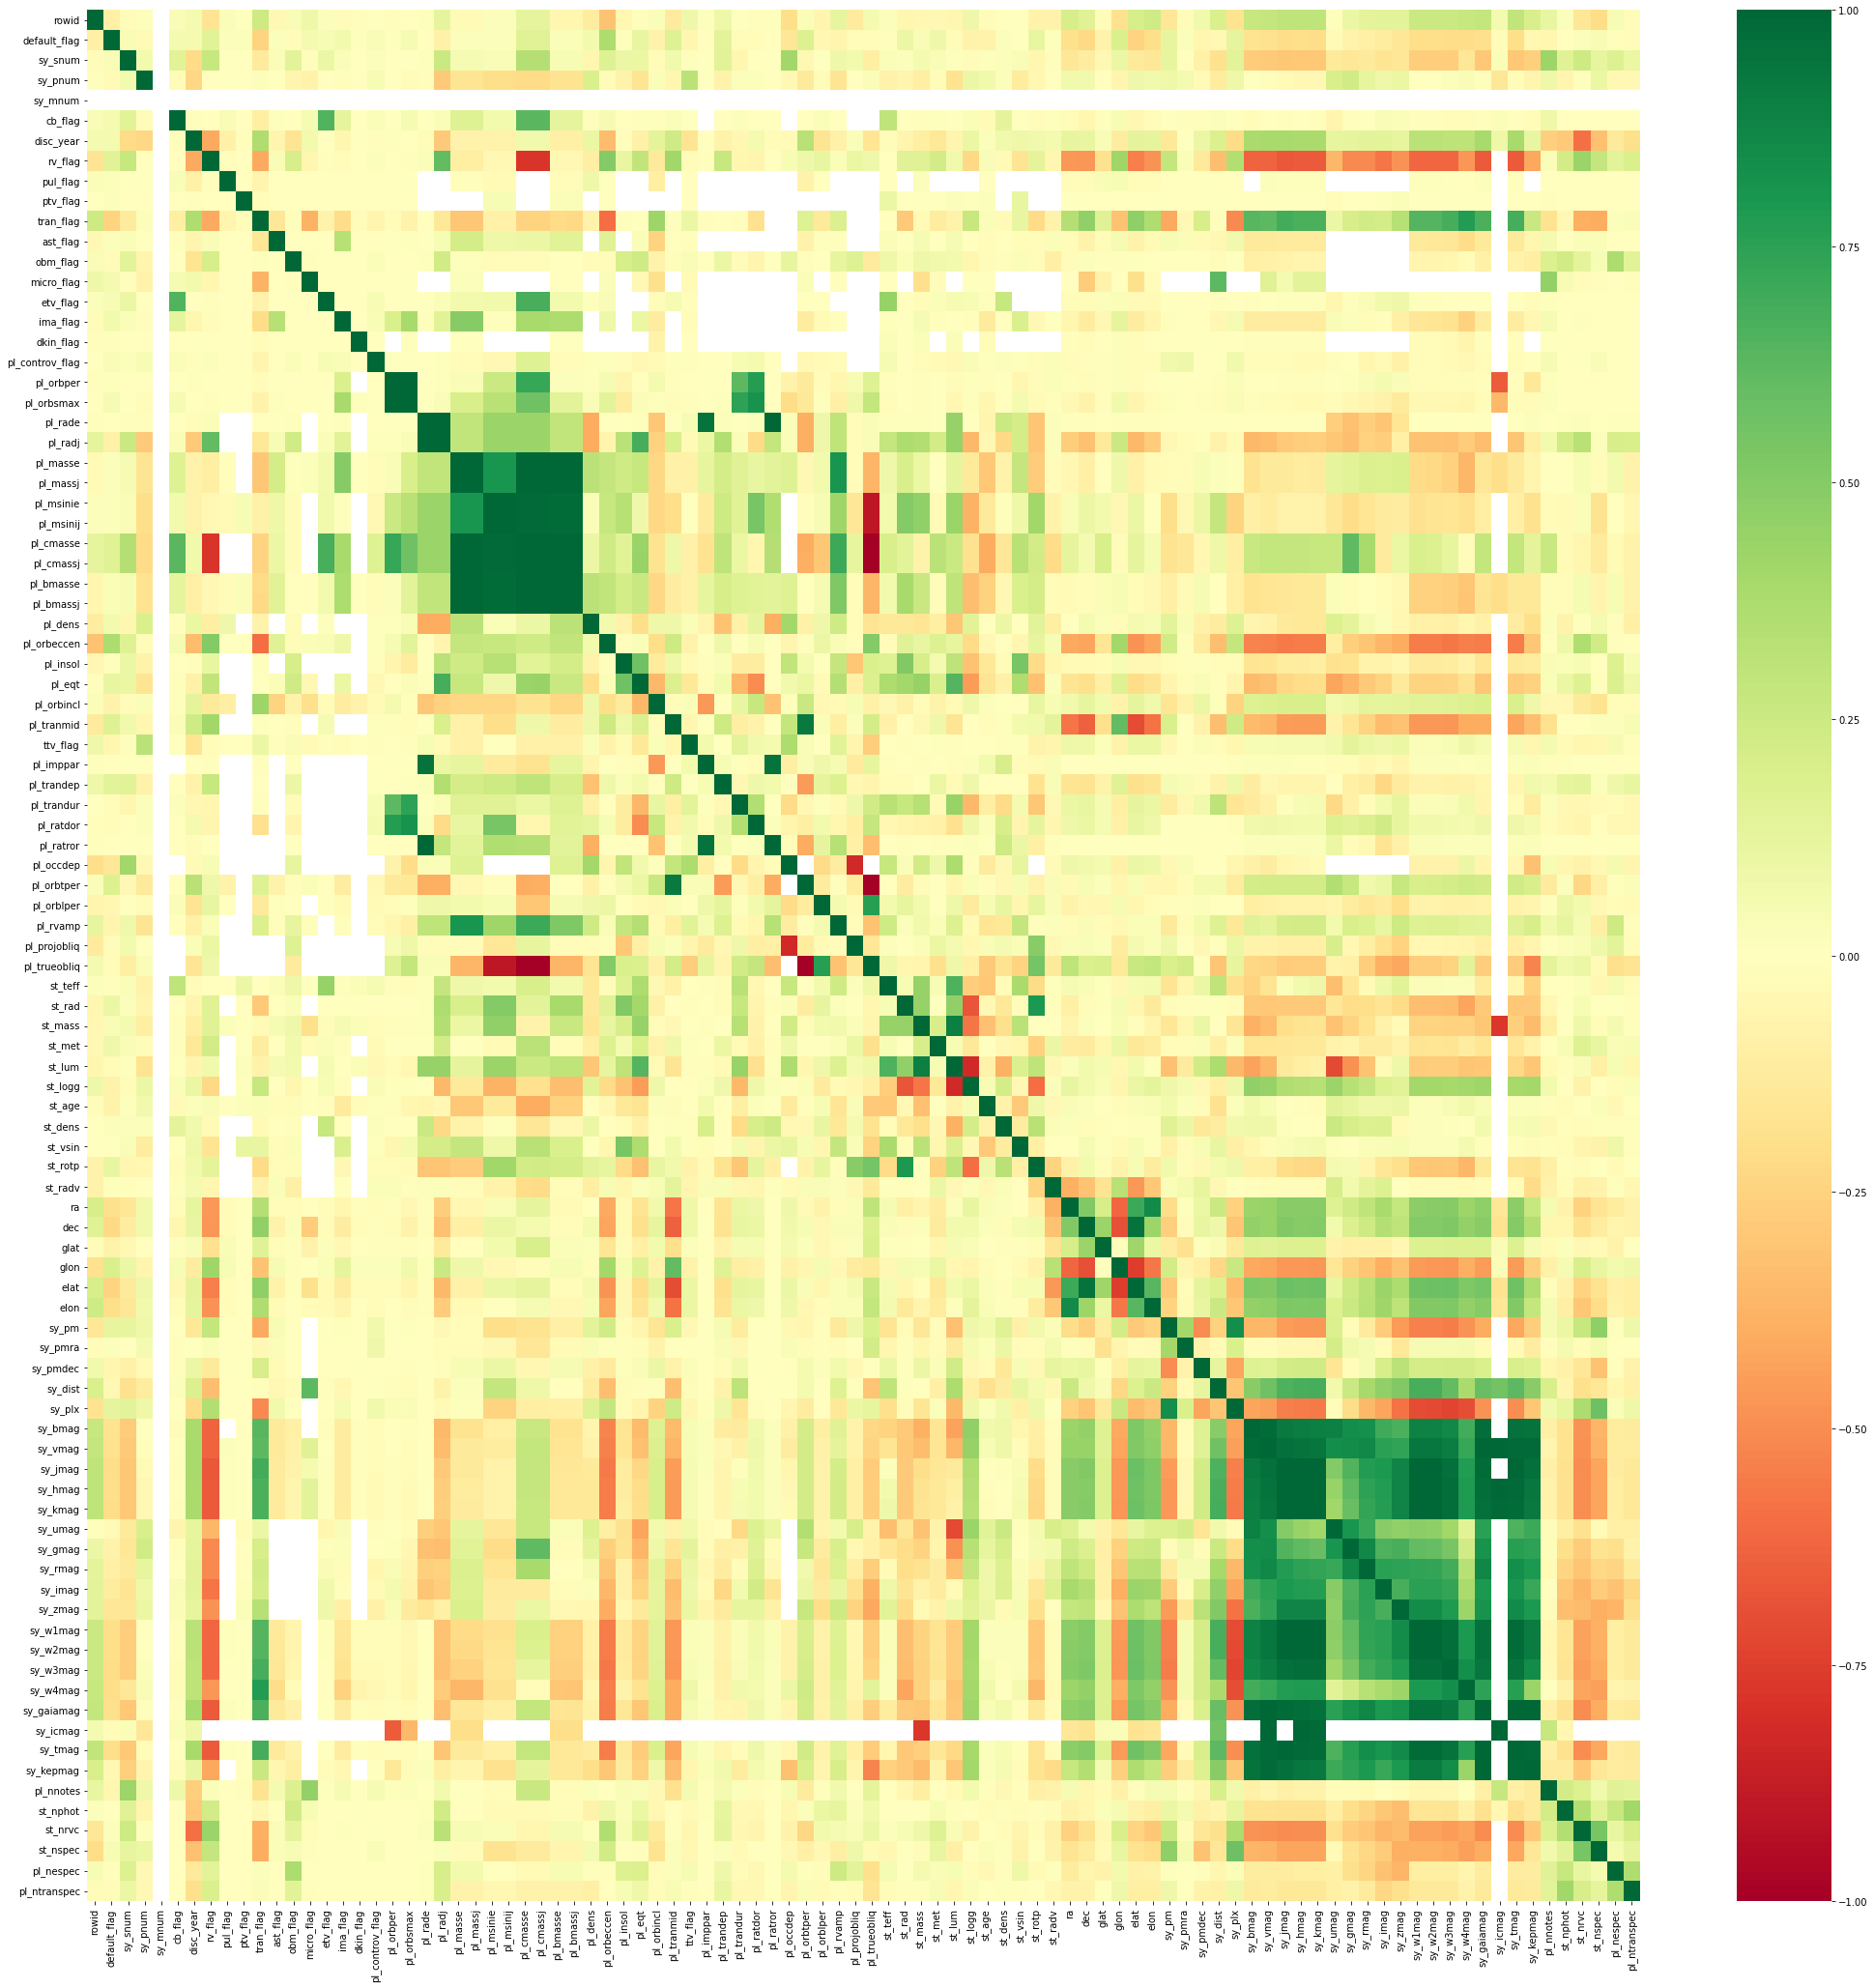

In [4]:
plt.figure(figsize=(36,36))
sns.heatmap(exoplanet_raw_df.corr(), cmap='RdYlGn')

plt.show()

In [ ]:
key_list = exoplanet_raw_df.keys().tolist()
corr_key_list = exoplanet_raw_df.corr().keys().tolist()

key_diff_list = [key for key in key_list if key not in corr_key_list]
print(', '.join(key_diff_list))

In [ ]:
radii_mass_df = exoplanet_raw_df.filter(['pl_orbper', 'pl_orbsmax','pl_radj', 'pl_massj', 'pl_msinij', 'pl_cmassj', 'pl_bmassj', 'pl_bmassprov', 'pl_dens'])
sns.pairplot(radii_mass_df)


In [ ]:
print(list(exoplanet_raw_df.keys()))

Analyzing the columns listed above for their benefit in understanding the dataset, the following were identified to be kept and explored over:
```
['pl_name', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_masse', 'pl_massj', 'pl_msinie', 'pl_msinij', 'pl_cmasse', 'pl_cmassj', 'pl_bmasse', 'pl_bmassj', 'pl_bmassprov', 'pl_dens', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_imppar', 'pl_trandep', 'pl_trandur', 'pl_ratdor', 'pl_ratror', 'pl_occdep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_projobliq', 'pl_trueobliq', 'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio', 'st_lum', 'st_logg', 'st_age', 'st_dens', 'st_vsin', 'st_rotp', 'st_radv', 'rastr', 'ra', 'decstr', 'dec', 'glat', 'glon', 'elat', 'elon', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'rowupdate']
```

In [ ]:
# Features to keep for analysis, as determined by relevance to regression interpretation objectives
feature_keep_list = ['pl_name', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'pl_orbper', 'pl_orbsmax', 'pl_rade', 'pl_radj', 'pl_masse', 'pl_massj', 'pl_msinie', 'pl_msinij', 'pl_cmasse', 'pl_cmassj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'pl_orbincl', 'pl_imppar', 'pl_trandep', 'pl_trandur', 'pl_ratdor', 'pl_ratror', 'pl_occdep', 'pl_orbtper', 'pl_orblper', 'pl_rvamp', 'pl_projobliq', 'pl_trueobliq', 'st_spectype', 'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_metratio', 'st_lum', 'st_logg', 'st_age', 'st_dens', 'st_vsin', 'st_rotp', 'st_radv', 'rastr', 'ra', 'decstr', 'dec', 'glat', 'glon', 'elat', 'elon', 'sy_pm', 'sy_pmra', 'sy_pmdec', 'sy_dist', 'sy_plx', 'rowupdate']

exoplanet_df = exoplanet_raw_df.filter(feature_keep_list, axis=1)
print(exoplanet_df.shape)
exoplanet_df.head()

# drop columns that contain an excessively NaN dataset
drop_parameter = 1.5

col_nan_drop_threshold = int(exoplanet_df.shape[0] / drop_parameter)
drop_list = list()
for col in exoplanet_df:
    nan_count = exoplanet_df[col].isna().sum()
    if nan_count > col_nan_drop_threshold:
        exoplanet_df = exoplanet_df.drop(col, axis=1)
        drop_list += [col]
    print(f'{col}: {nan_count}')
print(f'\nDropped cols per NaN content:\n{", ".join(drop_list)}')

exoplanet_df = exoplanet_df.dropna()

print(exoplanet_df.shape)
exoplanet_df.head()

In [ ]:
exoplanet_df.info()

# Regression Models
Summary of training at least three linear regression models which should be variations that cover using a simple linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(exoplanet_df.corr(), cmap='RdYlGn')

plt.show()

# Recommendation
1. A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.

# Key Findings and Insights
1. Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.

# Next Steps
1. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.